# КЛАССИФИКАЦИЯ ГОСКОНТРАКТОВ ПО ОБЪЕКТАМ ЗАКУПКИ

## Описание задачи
### Задача: необходимо на основе данных с ftp.zakupki.gov.ru научиться определять группу, к которой относится контракт с кодом ОКПД-2 41, 42, 43, 71.1.

Группы могут быть следующими:
1. Строительно-монтажные работы (СМР)
2. Проектно-изыскательские работы (ПИР)
3. Строительный надзор
4. Подключение коммуникаций
5. Прочее.

По ОКПД-2 контракты в общем случае должны разделяться так:
- Строительно-монтажные работы (СМР) - 41, 42, 43(кроме нижеперечисленных)
- Проектно-изыскательские работы (ПИР) - 41.1, 71.1
- Подключение коммуникаций - 43.22
- Строительный надзор – четкой группы нет.

**Проблема**: Далеко не всегда контракты указываются с нужным кодом, поэтому есть проблема как такие контракты "отловить" и определить в нужную группу. Поэтому задача предполагает классификацию контрактов на основе объекта закупки, который сформулирован естественным языком. Также предполагаем, что могут иметь значение цена контракта и его длительность.

На основе этого на входе данные о контрактах. На выходе необходимо получить группу для каждого контракта. Иногда контракт может относиться одновременно в несколько групп. В приложении ниже пример нескольких контрактов, у которых неверно проставлен ОКПД-2.

---

## Содержание

## Глава 1. Предобработка данных

1. [Загрузка и обработка данных](#1.-Загрузка-и-обработка-данных)

2. [Работа с выборкой данных](#2.-Работа-с-выборкой-данных)

- 2.1. [Длительность контракта](#2.1.-Длительность-контракта)
- 2.2. [Сумма контракта](#2.2.-Сумма-контракта)
- 2.3. [Объект закупки](#2.3.-Объект-закупки)
- 2.4. [ОКПД](#2.4.-ОКПД)

3. [Итоговый датасет](#3.-Итоговый-датасет)

Следующая часть **Глава 2. Модели** в отдельном файле


---

### Контакты

Собченко Анастасия Алексеевна, email: lobzinastya@gmail.com  

# 1. Загрузка и обработка данных

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
%%time

data = pd.read_csv('fz.csv', header=None, nrows=2_000_000, index_col = 0, on_bad_lines='skip', low_memory=False)
data.to_csv('updatedfz_2_000_000.csv')
data.head()

CPU times: user 28.2 s, sys: 1.59 s, total: 29.8 s
Wall time: 30.5 s


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1010101008321000006,211010101008301010100100100246820244,7707049388,"КРАСНОДАРСКИЙ ФИЛИАЛ ПАО \РОСТЕЛЕКОМ\""""",<НЕ ОПРЕДЕЛЕНО>,0101010083,"МО МВД РОССИИ \КОШЕХАБЛЬСКИЙ\""""",Республика Адыгея (Адыгея),18803020840390049244,Контракт исполнен,<НЕ ОПРЕДЕЛЕНО>,федеральный бюджет,2021-12-02,2021-01-01,2021-12-30,2022-01-14,2022-04-18,\N,<НЕ ОПРЕДЕЛЕНО>,\N,173380.50,0.00,"Изменение условий контракта, заключенного с ед...",<НЕ ОПРЕДЕЛЕНО>,Услуги по операциям с недвижимым имуществом,68.2
2,1010101008321000006,211010101008301010100100100246820244,7707049388,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО \РОСТЕЛЕКОМ\""""",78,0101010083,"МО МВД РОССИИ \КОШЕХАБЛЬСКИЙ\""""",Республика Адыгея (Адыгея),18803020840390049244,Контракт исполнен,<НЕ ОПРЕДЕЛЕНО>,федеральный бюджет,2021-12-02,2021-01-01,2021-12-30,2022-01-14,2022-04-18,\N,<НЕ ОПРЕДЕЛЕНО>,\N,173380.50,0.00,"Изменение условий контракта, заключенного с ед...",<НЕ ОПРЕДЕЛЕНО>,Услуги по операциям с недвижимым имуществом,68.2
3,1010101008321000007,211010101008301010100100100236820244,105076166,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \МАН ...,01,0101010083,"МО МВД РОССИИ \КОШЕХАБЛЬСКИЙ\""""",Республика Адыгея (Адыгея),18803020840390049244,Контракт исполнен,<НЕ ОПРЕДЕЛЕНО>,федеральный бюджет,2021-12-09,2021-12-09,2021-12-31,2022-01-14,2022-04-19,\N,<НЕ ОПРЕДЕЛЕНО>,\N,221778.00,\N,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,Услуги по операциям с недвижимым имуществом,68.2
4,1010501691421000144,211010501691401050100101960012640323,6630008994,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \КРУС...,66,0105016914,ГУ-РО ФОНДА СОЦИАЛЬНОГО СТРАХОВАНИЯ РОССИЙСКОЙ...,Республика Адыгея (Адыгея),39310030440139570323,Контракт исполнен,На поставку специальных устройств для чтения «...,бюджет Фонда социального страхования Российско...,2021-12-01,2021-12-01,2022-09-30,2022-10-07,2022-09-27,\N,<НЕ ОПРЕДЕЛЕНО>,281119.60,281119.60,0.00,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,"Оборудование компьютерное, электронное и оптич...",26.4
6,1010501691421000148,211010501691401050100101940012640323,7743763319,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \МЕДИ...,77,0105016914,ГУ-РО ФОНДА СОЦИАЛЬНОГО СТРАХОВАНИЯ РОССИЙСКОЙ...,Республика Адыгея (Адыгея),39310030440139570323,Контракт заключен,На поставку голосообразующих аппаратов для обе...,бюджет Фонда социального страхования Российско...,2021-12-03,2021-12-03,2022-09-30,2022-10-07,\N,\N,<НЕ ОПРЕДЕЛЕНО>,120597.44,77785.15,0.00,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,"Оборудование компьютерное, электронное и оптич...",26.4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 1 to 2523563
Data columns (total 26 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   1       int64 
 1   2       object
 2   3       int64 
 3   4       object
 4   5       object
 5   6       object
 6   7       object
 7   8       object
 8   9       object
 9   10      object
 10  11      object
 11  12      object
 12  13      object
 13  14      object
 14  15      object
 15  16      object
 16  17      object
 17  18      object
 18  19      object
 19  20      object
 20  21      object
 21  22      object
 22  23      object
 23  24      object
 24  25      object
 25  26      object
dtypes: int64(2), object(24)
memory usage: 412.0+ MB


In [4]:
data[26].value_counts()

26
21.2    194840
35.1    102462
35.3     88079
10.5     66287
32.5     62912
         ...  
98.2         4
78.1         3
64.3         1
66.3         1
07.1         1
Name: count, Length: 269, dtype: int64

Как мы видим в данных 269 видов разных кодов ОКПД. И многие (топ по количеству записей 21.2, 35.1, 35.3, 10.5 и тд) из них находятся в группах, которые вообще не относятся к формулировке нашей задачи.

Как выглядят наименования этих окпд-2:

In [5]:
pd.set_option('display.max_rows', None)

data[25].value_counts()

25
Продукты пищевые                                                                                                                                   299631
Средства лекарственные и материалы, применяемые в медицинских целях                                                                                210346
Электроэнергия, газ, пар и кондиционирование воздуха                                                                                               205663
Изделия готовые прочие                                                                                                                              86353
Продукция и услуги сельского хозяйства и охоты                                                                                                      73795
Вещества химические и продукты химические                                                                                                           72448
Услуги телекоммуникационные                                              

В указанных выше данных нет и названий групп, приведенных в условиях задачи "Строительно-монтажные работы (СМР)", "Проектно-изыскательские работы (ПИР)" и тд

В соответствии с формулировкой задачи у нас есть примеры контрактов, попробуем найти их в данных по номерам

**Попытка найти в данных примеры из таблицы, приведенной в формулировке задачи**

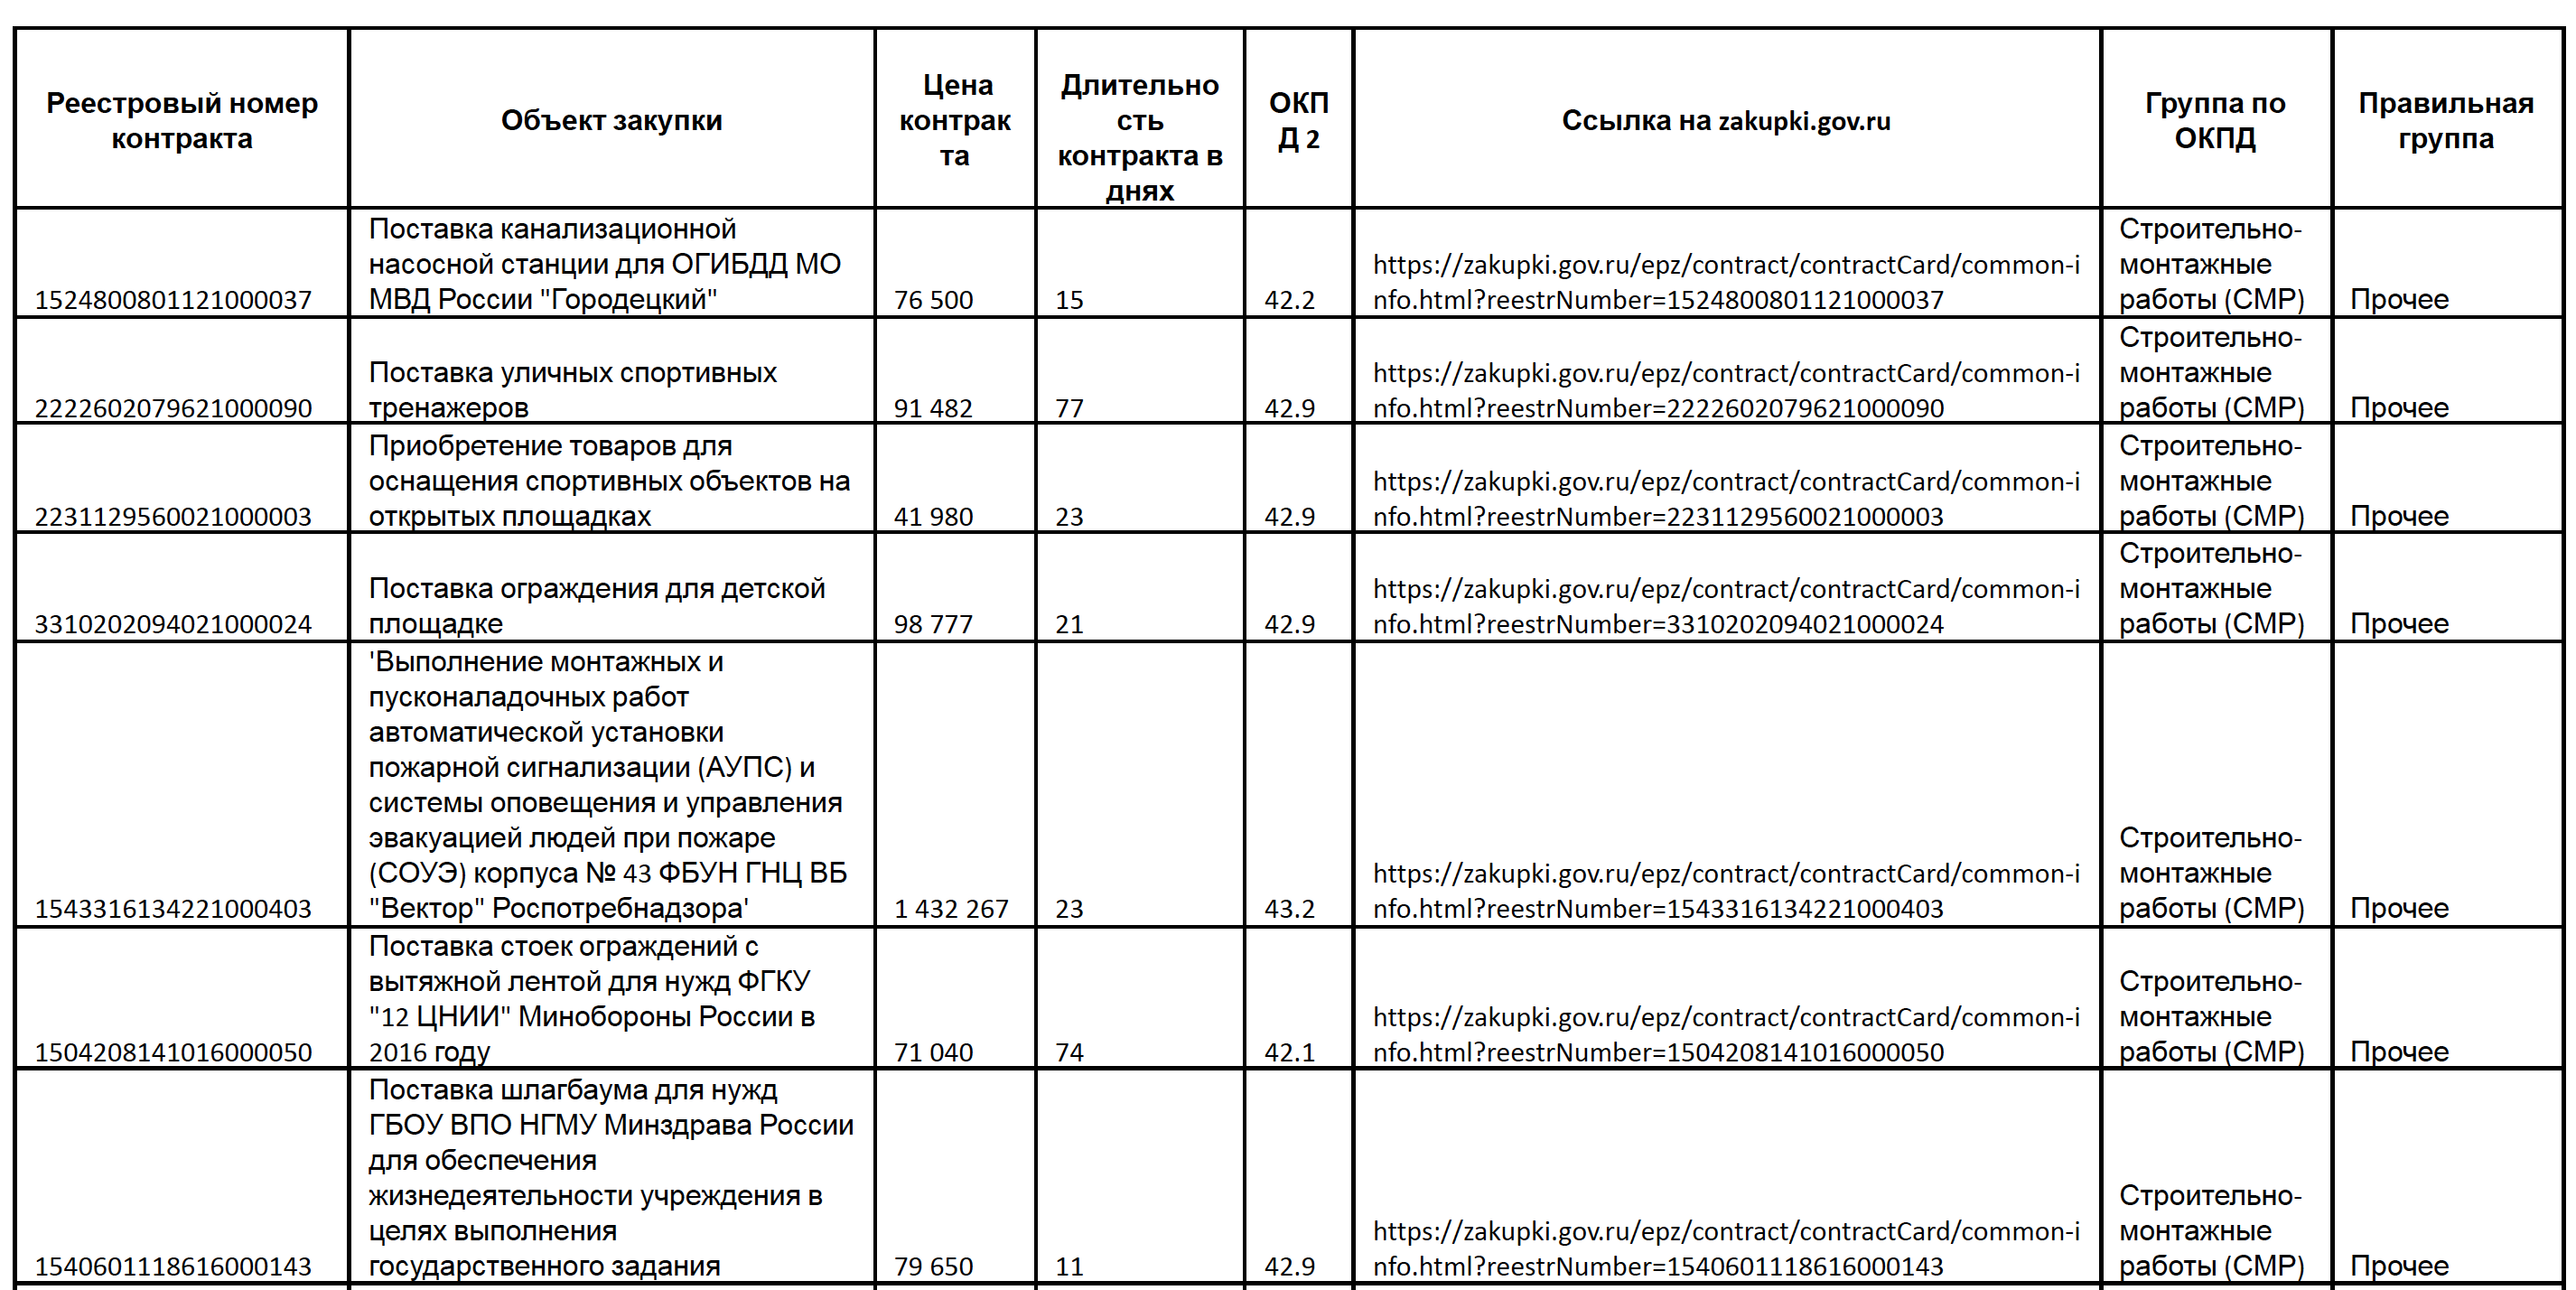

In [6]:
example_list = [
    "1524800801121000037",
    "2222602079621000090",
    "2231129560021000003",
    "3310202094021000024",
    "1543316134221000403",
    "1504208141016000050",
    "1540601118616000143",
    "2771596681416000055",
    "3131810616016000029",
    "3620900301117000007",
    "2616106092518000062",
    "3504301461717000061",
    "1771454974421000086",
    "1771454974421000082",
    "2650115377817000019"
]

In [7]:
data[data[1].isin(example_list)]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,,,,,,,,,,,,,,,,,,,,,,,,,,


**Результат**: Примеры отсутствуют

In [8]:
pd.set_option('display.max_rows', 20)

По ОКПД-2 контракты в общем случае должны разделяться так:
- Строительно-монтажные работы (СМР) - 41, 42, 43(кроме нижеперечисленных)
- Проектно-изыскательские работы (ПИР) - 41.1, 71.1
- **Подключение коммуникаций - 43.22**
- Строительный надзор – четкой группы нет.

In [9]:
data[data[26]=='43.22']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,,,,,,,,,,,,,,,,,,,,,,,,,,


# 2. Работа с выборкой данных

Полученная выборка из 2 000 000 записей у нас сохранена, будем работать с ней

In [10]:
#преобразование названий колонок в строковый тип. Нужно, чтобы было единобразие с тем случаем, когда данные data загружаются из файла с 2000000 выборкой, а не из полного
# (как в закомментированном коде далее)
data.columns = data.columns.map(str)

In [11]:
# del data
# #file_path = '/content/drive/MyDrive/Colab Notebooks/Baumana_final_project/'
# data = pd.read_csv('updatedfz_2_000_000.csv', low_memory=False)

data.sample(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,,,,,,,,,,,,,,,,,,,,,,,,,,
1039211,1041111231018000192,181041111231004110100101300012620242,9102205099,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \ИНЖЕ...,91,0411112310,ОФСИН РОССИИ ПО РЕСПУБЛИКЕ АЛТАЙ,Республика Алтай,32003054230290049242,Контракт исполнен,поставка картриджей и расходных материалов к ним,федеральный бюджет,2018-12-25,2018-12-25,2018-12-30,2019-01-15,2019-01-10,\N,<НЕ ОПРЕДЕЛЕНО>,132100.00,130460.00,\N,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,"Оборудование компьютерное, электронное и оптич...",26.2
1147813,1770901829718000102,181770901829777020100102162166120000,7713076301,ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО \ВЫМПЕЛ-КОММУНИ...,<НЕ ОПРЕДЕЛЕНО>,7709018297,"ФГБУ \РЭА\"" МИНЭНЕРГО РОССИИ""",Город Москва столица Российской Федерации горо...,<НЕ ОПРЕДЕЛЕНО>,Контракт исполнен,Услуги по предоставлению подвижной радиотелефо...,\N,2018-12-25,2018-12-25,2020-01-31,2020-02-07,2020-01-22,\N,<НЕ ОПРЕДЕЛЕНО>,1800000.00,1800000.00,\N,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,Услуги телекоммуникационные,61.2
574894,3310263550216000035,\N,3123226934,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \АРИС...,31,3102635502,"МОУ \НАЧАЛЬНАЯ ШКОЛА П. ДУБОВОЕ\""""",Белгородская область,<НЕ ОПРЕДЕЛЕНО>,Исполнение контракта прекращено,"Поставка продуктов питания - апельсины, бананы...",\N,2016-07-27,2016-07-27,2016-12-31,2017-01-13,\N,2016-12-31,Соглашение сторон,2985660.00,232650.00,0.00,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,Продукция и услуги сельского хозяйства и охоты,01.2
874479,2712800051117000121,172710702761871070100100010671086244,4025069820,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \ ТОР...,40,7128000511,"ГУЗ ТО \КИРЕЕВСКАЯ ЦРБ\""""",Тульская область,<НЕ ОПРЕДЕЛЕНО>,Исполнение контракта прекращено,Поставка продукции молочной промышленности (ма...,\N,2017-04-26,2017-04-26,2017-09-30,2017-10-06,\N,2017-09-22,Соглашение сторон,4804125.00,189750.00,\N,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,Продукты пищевые,10.5
276697,3666005552921000175,213666005552966700100102660013250244,7729780792,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \БРИЗ\""""",77,6660055529,"ГБУЗ СО \ЕКПЦ\""""",Свердловская область,<НЕ ОПРЕДЕЛЕНО>,Контракт исполнен,Ларингоскоп одноразовый,\N,2021-12-07,2021-12-07,2022-04-30,2022-05-12,2021-12-22,\N,<НЕ ОПРЕДЕЛЕНО>,359708.01,356475.00,\N,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,Изделия готовые прочие,32.5
1186175,2110148713519000017,182110148713511010100105850010000000,1101053258,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \ДИАГ...,11,1101487135,"ГБУЗ РК \КРКБ\""""",Республика Коми,<НЕ ОПРЕДЕЛЕНО>,Контракт исполнен,«На поставку расходного материала для иммуно...,\N,2018-12-28,2018-12-28,2019-12-31,2020-01-15,2019-12-17,\N,<НЕ ОПРЕДЕЛЕНО>,146339.61,146339.61,\N,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,Изделия резиновые и пластмассовые,22.2
2453163,2590801041116000334,\N,1831145462,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \ДИЛИ...,18,5908010411,"ГБУЗ ПК \КМСЧ № 11 ИМ. С. Н. ГРИНБЕРГА\""""",Пермский край,<НЕ ОПРЕДЕЛЕНО>,Контракт исполнен,Поставка стентов коронарных баллонорасширяемых,\N,2016-10-17,2016-10-17,2017-03-31,2017-04-07,2016-12-27,\N,<НЕ ОПРЕДЕЛЕНО>,2810250.00,3046410.00,264262.50,При увеличении по предложению заказчика предус...,<НЕ ОПРЕДЕЛЕНО>,Изделия готовые прочие,32.5
2366097,1700201629516000020,\N,7002017210,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \ТЕПЛ...,70,7002016295,"МО МВД РОССИИ \АСИНОВСКИЙ\"" УМВД РОССИИ ПО ТОМ...",Томская область,18803020840390049244,Исполнение контракта прекращено,Оказание услуг по поставке тепловой энергии,федеральный бюджет,2016-10-05,2016-09-15,2017-01-31,2017-02-07,\N,2017-02-22,Соглашение сторон,15000.00,15000.00,\N,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,"Электроэнергия, газ, пар и кондиционирование в...",35.3
277528,3680500837021000026,213680500837068050100100360020000244,680600015091,Саблин Сергей Владимирович,<НЕ ОПРЕДЕЛЕНО>,6805008370,"МБОУ \КРАСИВСКАЯ СОШ\""""",Тамбовская область,<НЕ ОПРЕДЕЛЕНО>,Контракт заключен,Поставка продуктов питания (бакалея) для приг...,местный бюджет,

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 1 to 2523563
Data columns (total 26 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   1       int64 
 1   2       object
 2   3       int64 
 3   4       object
 4   5       object
 5   6       object
 6   7       object
 7   8       object
 8   9       object
 9   10      object
 10  11      object
 11  12      object
 12  13      object
 13  14      object
 14  15      object
 15  16      object
 16  17      object
 17  18      object
 18  19      object
 19  20      object
 20  21      object
 21  22      object
 22  23      object
 23  24      object
 24  25      object
 25  26      object
dtypes: int64(2), object(24)
memory usage: 412.0+ MB


Сгруппируем некоторые из интересующих нас колонок 

In [13]:
date_cols = ['13', '14', '15', '16', '17', '18']
sum_cols = ['20', '21', '22']
necessary_cols = ['11', '25', '26']

В соответствии с условием задачи: "предполагаем, что могут иметь значение цена контракта и его длительность."

## 2.1. Длительность контракта

In [14]:
data[date_cols][:10]

,13,14,15,16,17,18
0,,,,,,
1,2021-12-02,2021-01-01,2021-12-30,2022-01-14,2022-04-18,\N
2,2021-12-02,2021-01-01,2021-12-30,2022-01-14,2022-04-18,\N
3,2021-12-09,2021-12-09,2021-12-31,2022-01-14,2022-04-19,\N
4,2021-12-01,2021-12-01,2022-09-30,2022-10-07,2022-09-27,\N
6,2021-12-03,2021-12-03,2022-09-30,2022-10-07,\N,\N
8,2021-12-01,2021-12-01,2021-12-31,2022-01-14,2021-12-13,\N
9,2021-12-06,2021-12-06,2022-09-30,2022-10-07,\N,\N
10,2021-12-06,2021-12-06,2022-09-30,2022-10-07,2022-07-20,\N
11,2021-12-06,2021-12-06,2022-08-31,2022-09-07,\N,\N


In [15]:
# заменяем пустые значения 
data.replace(['\\N'], np.nan, inplace=True)

In [16]:
for col in date_cols:
  data[col] = pd.to_datetime(data[col], errors='coerce')
data[date_cols]

,13,14,15,16,17,18
0,,,,,,
1,2021-12-02,2021-01-01,2021-12-30,2022-01-14,2022-04-18,NaT
2,2021-12-02,2021-01-01,2021-12-30,2022-01-14,2022-04-18,NaT
3,2021-12-09,2021-12-09,2021-12-31,2022-01-14,2022-04-19,NaT
4,2021-12-01,2021-12-01,2022-09-30,2022-10-07,2022-09-27,NaT
6,2021-12-03,2021-12-03,2022-09-30,2022-10-07,NaT,NaT
...,...,...,...,...,...,...
2523559,2016-10-17,2016-10-17,2016-11-17,2016-11-24,2016-11-17,NaT
2523560,2016-10-17,2016-10-17,2016-11-17,2016-11-24,2016-11-17,NaT
2523561,2016-10-25,2016-10-25,2016-11-25,2016-12-02,2016-12-12,NaT


In [17]:
# количество нулевых значений (NaT специальное нулевое значение для времени)
data[date_cols].isna().sum()

13          1
14         41
15         85
16        694
17     605374
18    1568657
dtype: int64

In [18]:
# описательная статистика
data[date_cols].describe().T

,count,mean,min,25%,50%,75%,max
13,1999999,2018-02-24 02:54:14.837227776,2016-01-01 00:00:00,2016-10-24 00:00:00,2017-12-21 00:00:00,2018-12-24 00:00:00,2023-02-03 00:00:00
14,1999959,2018-02-22 23:40:37.766574336,2001-04-11 00:00:00,2016-10-24 00:00:00,2017-12-25 00:00:00,2018-12-26 00:00:00,2023-12-20 00:00:00
15,1999915,2018-09-24 09:24:52.747642368,2016-07-01 00:00:00,2017-02-28 00:00:00,2018-04-30 00:00:00,2019-08-31 00:00:00,2121-12-31 00:00:00
16,1999306,2018-10-05 12:38:40.256329216,2016-07-05 00:00:00,2017-03-07 00:00:00,2018-05-10 00:00:00,2019-09-06 00:00:00,2122-01-07 00:00:00
17,1394626,2018-08-05 08:34:55.199143168,2016-07-01 00:00:00,2017-04-26 00:00:00,2018-03-02 00:00:00,2019-06-06 00:00:00,2022-10-16 00:00:00
18,431343,2019-01-02 04:44:49.189809408,2002-12-31 00:00:00,2017-12-26 00:00:00,2019-01-09 00:00:00,2019-12-24 00:00:00,2022-10-14 00:00:00


**Возможно**, наши шесть колонок с датами это:

- Дата объявления закупки (Дата размещения заказа) ?
- Дата окончания подачи заявок (Дата окончания подачи предложений) ?
- Дата подписания контракта ?
- Дата исполнения контракта (Дата завершения контракта) ?
- Дата отмены/аннулирования закупки (Дата отмены процедуры) ?
- Дата публикации отчёта о выполнении контракта (Дата отчета о выполнении контракта) ?

Как найти длительность контракта в днях ? Будем считать, что это разница между двумя ключевыми датами: датой начала контракта и датой его завершения, то есть колонками 15, 16

In [19]:
data['duration'] = (data['16'] - data['15']).dt.days

In [20]:
pd.options.display.float_format = '{:.2f}'.format
data['duration'].describe()

count   1999254.00
mean         11.28
std           7.65
min        -374.00
25%           7.00
50%          13.00
75%          15.00
max        1893.00
Name: duration, dtype: float64

Замечаем, что есть данные, в которых такая длительность получилась отрицательной. Проверим, сколько их, если мало - удалим

Но будем считать, что допустимо, что длительность контракта равна нулю, когда день подписания и день исполнения тождественны

In [21]:
print(f"Число записей в данных, где получившаяся длительность контракта меньше или равна нуля: {data[data['duration']<0].shape[0]} / {data.shape[0]}")

Число записей в данных, где получившаяся длительность контракта меньше или равна нуля: 538 / 2000000


In [22]:
data = data[data['duration']>=0]
print('Размерность оставшихся данных',data.shape) #с учетом еще null значений ( см результат описательной статистики, было меньше 2млн записей)

Размерность оставшихся данных (1998716, 27)


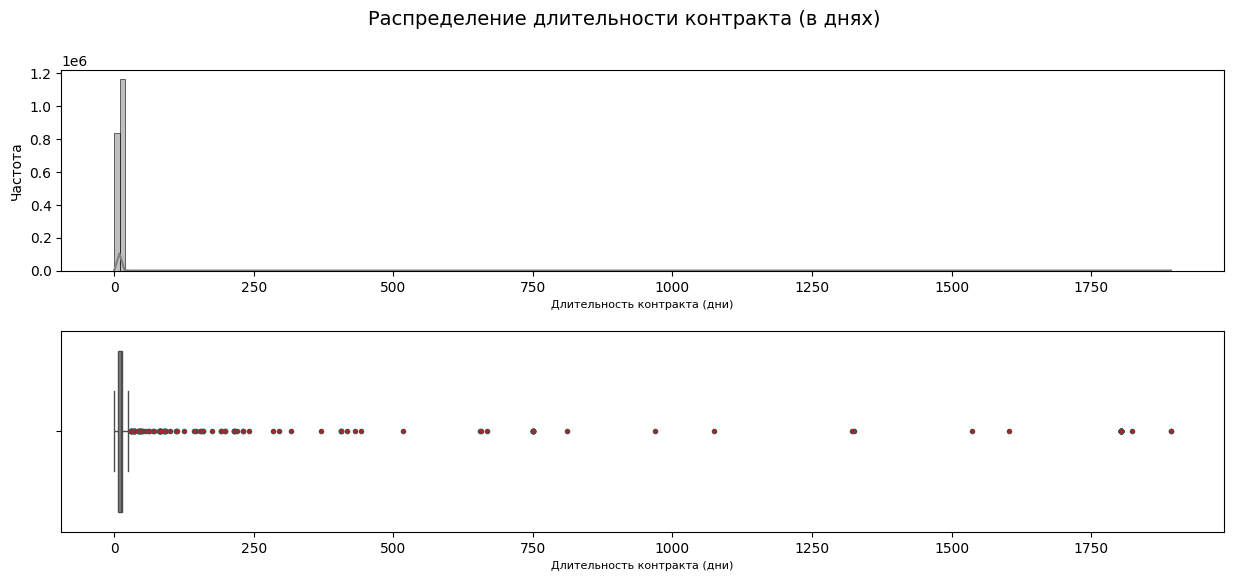

In [23]:
plt.figure(figsize=(15, 6))

plt.subplot(2,1,1)
sns.histplot(data['duration'], binwidth=10, kde=True, color = 'gray')

plt.xlabel('Длительность контракта (дни)', fontsize=8)
plt.ylabel('Частота', fontsize=10)

plt.subplot(2,1,2)
sns.boxplot(x = data['duration'], color = 'gray', flierprops={'marker':'o', 'markerfacecolor':'red', 'markersize':3})
plt.xlabel('Длительность контракта (дни)', fontsize=8)

plt.suptitle('Распределение длительности контракта (в днях)', fontsize=14)
plt.subplots_adjust(hspace=0.3) 
plt.show()

## 2.2. Сумма контракта

Колонки, связанные с суммами контрактов, могут быть следующими:

- Начальная (максимальная) цена контракта (Начальная стоимость контракта) ?
- Фактическая стоимость контракта (Цена контракта) ?
- Фактически выплаченная сумма (Оплаченная сумма) ?


In [24]:
data[sum_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998716 entries, 1 to 2523563
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   20      object
 1   21      object
 2   22      object
dtypes: object(3)
memory usage: 61.0+ MB


In [25]:
# заменяем такие значения 
data.replace(['<НЕ ОПРЕДЕЛЕНО>'],np.nan, inplace=True)

In [26]:
for col in sum_cols:
  data[col] = pd.to_numeric(data[col], errors='coerce')

data[sum_cols]

,20,21,22
0,,,
1,NaN,173380.50,0.00
2,NaN,173380.50,0.00
3,NaN,221778.00,NaN
4,281119.60,281119.60,0.00
6,120597.44,77785.15,0.00
...,...,...,...
2523559,2351945.00,2351945.00,0.00
2523560,2351945.00,2351945.00,0.00
2523561,874600.00,874600.00,NaN


In [27]:
data[sum_cols].isna().sum()

20     190040
21        305
22    1412412
dtype: int64

In [28]:
data[sum_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
20,1808676.00,6071282.65,64675130.40,0.01,96000.00,336000.00,1320551.20,35734930580.00
21,1998411.00,1877779.88,44439350.48,-2363472.10,42935.00,152342.46,525321.00,35734930580.00
22,586304.00,13616.57,9723575.88,-1018620800.00,0.00,0.00,0.00,5188225044.46


В колонках 20 и особенно 22 слишком много пропусков. Колонка 22 по описательным характеристикам похожа не на 21, сумму контракта или 22, фактически выплаченную, а скорее какое-то отклонение от суммы контракта

Будем считать, что сумма контракта это столбец 21

In [29]:
print(f"Число записей в данных, где получившаяся сумма контракта меньше или равна нуля: {data[data['21']<=0].shape[0]} / {data.shape[0]}")

Число записей в данных, где получившаяся сумма контракта меньше или равна нуля: 822 / 1998716


Удаляем такие строки, их не слишком много по сравнению с общим количеством данных (заодно таким образом уберем строки с отсутствующими значениями (см. результат работы describe)

In [30]:
data = data[data['21']>0]
print('Размерность оставшихся данных',data.shape)

Размерность оставшихся данных (1997589, 27)


In [31]:
data.rename(columns={'21': 'sum'}, inplace=True)

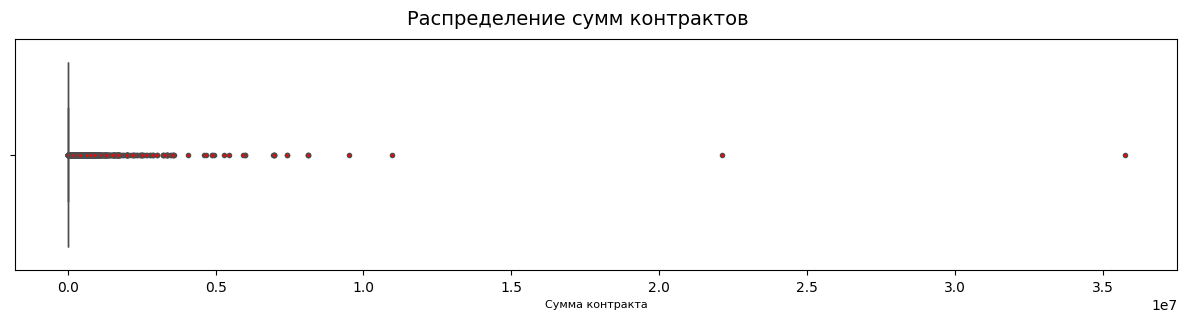

In [32]:
sum_thousands = data['sum'] / 1000

plt.figure(figsize=(15, 3))
sns.boxplot(x = sum_thousands, color = 'gray', flierprops={'marker':'o', 'markerfacecolor':'red', 'markersize':3})
plt.xlabel('Сумма контракта', fontsize=8)
plt.suptitle('Распределение сумм контрактов', fontsize=14)
plt.show()

In [33]:
# %%time

# plt.figure(figsize=(15, 6))

# plt.subplot(2,1,1)
# sns.histplot(sum_thousands, kde=True, color = 'gray')

# plt.xlabel('Сумма контракта', fontsize=8)
# plt.ylabel('Частота', fontsize=10)

# plt.subplot(2,1,2)
# sns.boxplot(x = sum_thousands, color = 'gray', flierprops={'marker':'o', 'markerfacecolor':'red', 'markersize':3})
# plt.xlabel('Сумма контракта', fontsize=8)

# plt.suptitle('Распределение сумм контрактов', fontsize=14)
# plt.subplots_adjust(hspace=0.3) 
# plt.show()

## 2.3. Объект закупки

In [34]:
pd.set_option('display.max_colwidth', None)
print(data['11'].sample(5, random_state=42))

0
2488710                  Закупка хозяйственных товаров для нужд ГБУЗ \ДГП № 69 ДЗМ\""
760273     Продукция материально- технического назначения(мешки для сортировки почты)
2330150                                                        поставка ткани и ниток
591062                                          Отпуск и потребление тепловой энергии
1304283                        Оказание услуг холодного водоснабжения и водоотведения
Name: 11, dtype: object


In [35]:
# Число пустых записей
data['11'].isna().sum()

190023

Поскольку основная проблематика работы - обработка текста объекта контракта, решительно убираем все записи, где текст контракта пустой

In [36]:
print('Число записей до удаления пустых:', data.shape[0])
data.dropna(subset=['11'], inplace=True)
print('Число записей после:', data.shape[0])

Число записей до удаления пустых: 1997589
Число записей после: 1807566


In [37]:
data['11'] = data['11'].astype(str)
data.rename(columns={'11': 'text'}, inplace=True)

## 2.4. ОКПД

In [38]:
data['25'].nunique()

103

In [39]:
data['26'].nunique()

267

In [40]:
data['26'].unique()

array(['26.4', '26.6', '32.5', '30.9', '17.2', '33.1', '27.9', '26.2',
       '26.3', '22.1', '22.2', '18.1', '28.3', '95.1', '32.9', '68.1',
       '58.1', '27.2', '86.9', '31.0', '58.2', '20.5', '21.2', '21.1',
       '20.2', '10.8', '19.2', '28.2', '45.3', '17.1', '25.2', '95.2',
       '29.3', '56.1', '01.1', '10.1', '03.1', '10.5', '10.2', '10.6',
       '10.3', '10.7', '01.2', '01.4', '26.7', '29.1', '20.4', '24.1',
       '56.2', '28.1', '23.5', '20.3', '14.1', '65.1', '23.9', '81.2',
       '27.1', '27.4', '27.3', '43.2', '96.0', '85.4', '25.7', '26.5',
       '93.2', '62.0', '43.3', '80.2', '80.1', '41.2', '27.5', '45.2',
       '32.3', '86.1', '26.1', '10.4', '74.3', '63.9', '84.2', '53.1',
       '25.9', '63.1', '15.2', '13.9', '86.2', '42.9', '61.2', '11.0',
       '71.2', '81.1', '61.1', '24.2', '16.2', '23.3', '52.2', '49.4',
       '38.2', '52.1', '43.9', '13.1', '38.1', '05.1', '26.8', '91.0',
       '71.1', '61.3', '61.9', '46.5', '33.2', '28.9', '32.4', '24.4',
      

In [41]:
data['26_len'] = data['26'].map(lambda x: len(str(x).split('.')))
data['26_len'].value_counts()

26_len
2    1806621
1        945
Name: count, dtype: int64

Другая неотъемлемая часть проблематики работы - классификация закупок. Поскольку у нас нет дополнительных данных о группе по ОКПД, мы для целей классификации будем рассматривать столбец с кодом ОКПД2 (как будт показано позднее столбец 25 - это просто его однозначная расшифровка, т.е. у одного окпд2 -> единственная расшифровка)

Так что удаляем из данных пустые значения кода окпд2

In [42]:
print('Число записей до удаления пустых ОКПД:', data.shape[0])
data.dropna(subset=['26'], inplace=True)
print('Число записей после:', data.shape[0])

Число записей до удаления пустых ОКПД: 1807566
Число записей после: 1806621


Добавим еще столбец с прозводной от кода ОКПД2 - группой (первая часть кода, до точки)

In [43]:
data['okpd_group'] = data['26'].map(lambda x: str(x).split('.')[0])
data['okpd_group'].nunique()

87

In [44]:
data.rename(columns={'26': 'okpd', '25': 'okpd_description'}, inplace=True)

In [45]:
data.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'text', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', 'sum', '22', '23', '24',
       'okpd_description', 'okpd', 'duration', '26_len', 'okpd_group'],
      dtype='object')

# 3. Итоговый датасет

In [46]:
columns_list = ['text', 'duration', 'sum','okpd', 'okpd_group', 'okpd_description']

df = data[columns_list].copy()
df.info()

del data

<class 'pandas.core.frame.DataFrame'>
Index: 1806621 entries, 4 to 2523563
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   text              object 
 1   duration          float64
 2   sum               float64
 3   okpd              object 
 4   okpd_group        object 
 5   okpd_description  object 
dtypes: float64(2), object(4)
memory usage: 96.5+ MB


In [47]:
df.sample(10)

,text,duration,sum,okpd,okpd_group,okpd_description
0,,,,,,
224876,Поставка канцелярских принадлежностей для нужд отдела сельского хозяйства администрации Ачинского района,14.00,2973.73,22.2,22,Изделия резиновые и пластмассовые
405815,Поставка расходных материалов для отделений,13.00,192944.90,32.5,32,Изделия готовые прочие
1192617,Рентген пленка,15.00,141035.98,20.5,20,Вещества химические и продукты химические
1642337,Оказание услуг по регулярным перевозкам пассажиров автомобильным транспортом на территории МО «Томаринский городской округ»,7.00,2300000.00,49.3,49,Услуги сухопутного и трубопроводного транспорта
729001,Подписка на периодические печатные издания,15.00,87064.74,53.1,53,Услуги почтовой связи и услуги курьерские
1733998,"Услуги по предоставлению внутризоновых, междугородных и международных телефонных соединений",15.00,89000.00,61.1,61,Услуги телекоммуникационные
1790443,Закупка оборудования и запасных частей для нужд театра,7.00,2965589.99,27.4,27,Оборудование электрическое
1767636,Услуги по экстренному реагированию нарядов полиции в случае срабатывания тревожной сигнализации,15.00,174586.80,84.2,84,"Услуги в области государственного управления и обеспечения военной безопасности, услуги в области обязательного социального обеспечения"
2001215,Масло сливочное,7.00,73100.00,10.5,10,Продукты пищевые


Так мы получили интересующие нас данные - датасет df, где есть текст закупки, длительность контракта, сумма контракта, окпд2 (который станет меткой класса) и несколько дополнительных столбцов с расшифровкой окпд, группой окпд

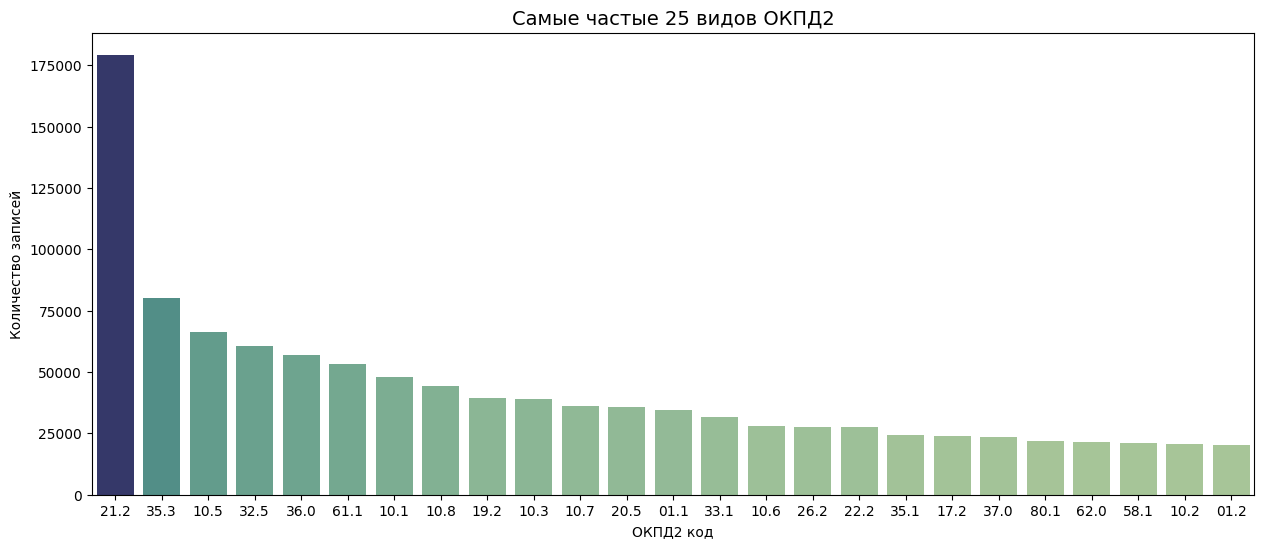

In [48]:
N = 25

plt.figure(figsize = (15, 6))
top_okpd = pd.DataFrame(df['okpd'].value_counts()[:N]).reset_index()
sns.barplot(top_okpd, x='okpd', y='count', hue = 'count', palette = 'crest', legend = False)
plt.title(f'Самые частые {N} видов ОКПД2', fontsize=14)
plt.xlabel('ОКПД2 код', fontsize=10)
plt.ylabel('Количество записей', fontsize=10)
plt.show()

In [49]:
top_okpd

,okpd,count
0,21.2,179323
1,35.3,79983
2,10.5,66153
3,32.5,60442
4,36.0,57106
...,...,...
20,80.1,21990
21,62.0,21487
22,58.1,21191
23,10.2,20777


Группируем данные по двум столбцам - окпд и расшифровке окпд. Если число получившихся записей бует равно числу уникальных вариантов окпд, значит у каждого окпд есть только одна расшифровка. Проверим, так ли это

In [50]:
df_statistics = pd.DataFrame(df.groupby(by = ['okpd', 'okpd_description'])['text'].count())
df_statistics.rename(columns={'text':'count'}, inplace=True)
df_statistics.sort_values(by='count', ascending = False, inplace = True)

pd.set_option('display.max_rows', 100) 
df_statistics.head(100)

,,count
okpd,okpd_description,
21.2,"Средства лекарственные и материалы, применяемые в медицинских целях",179323
35.3,"Электроэнергия, газ, пар и кондиционирование воздуха",79983
10.5,Продукты пищевые,66153
32.5,Изделия готовые прочие,60442
36.0,Вода природная; услуги по очистке воды и водоснабжению,57106
61.1,Услуги телекоммуникационные,53427
10.1,Продукты пищевые,47854
10.8,Продукты пищевые,44513
19.2,Кокс и нефтепродукты,39563


In [51]:
df['okpd'].nunique() == df_statistics.shape[0]

True

In [52]:
# Составляем словарь расшифровки
okpd_dict_full = {i:j for i,j in df_statistics.index}
print(okpd_dict_full)

{'21.2': 'Средства лекарственные и материалы, применяемые в медицинских целях', '35.3': 'Электроэнергия, газ, пар и кондиционирование воздуха', '10.5': 'Продукты пищевые', '32.5': 'Изделия готовые прочие', '36.0': 'Вода природная; услуги по очистке воды и водоснабжению', '61.1': 'Услуги телекоммуникационные', '10.1': 'Продукты пищевые', '10.8': 'Продукты пищевые', '19.2': 'Кокс и нефтепродукты', '10.3': 'Продукты пищевые', '10.7': 'Продукты пищевые', '20.5': 'Вещества химические и продукты химические', '01.1': 'Продукция и услуги сельского хозяйства и охоты', '33.1': 'Услуги по ремонту и монтажу машин и оборудования', '10.6': 'Продукты пищевые', '26.2': 'Оборудование компьютерное, электронное и оптическое', '22.2': 'Изделия резиновые и пластмассовые', '35.1': 'Электроэнергия, газ, пар и кондиционирование воздуха', '17.2': 'Бумага и изделия из бумаги', '37.0': 'Услуги по водоотведению; шлам сточных вод', '80.1': 'Услуги по обеспечению безопасности и проведению расследований', '62.0': 'П

C учетом df_statistics в которой видно число записей для каждого кода окпд, подберем несколько кодов окпд2, которые будем использовать дальше, для задачи классификации.
Поскольку хотелось бы оставаться в примерных рамках сформулированной нам задачи это будут следующие окпд-2, связанные со строительством и начальной постановкой задачи

**!!! Хочется отметить**, что при желании этот список кодов окпд может быть расширен или преобразован другим способом. К сожалению другого, более явного и очевидного способа привести формулировку исходной задачи к работе с предоставленными данными мне найти не удалось

In [53]:
okpds = ['43.2', '71.1', '42.1', '41.2']
for code in okpds:
    print(code, okpd_dict_full[code])

43.2 Работы строительные специализированные
71.1 Услуги в области архитектуры и инженерно-технического проектирования, технических испытаний, исследований и анализа
42.1 Сооружения и строительные работы в области гражданского строительства
41.2 Здания и работы по возведению зданий


И составляем итоговый датасет, с которым мы будем работать!

В ходе всех преобразований, очистки данных, выбора нужной нам информации от 2млн записей осталось чуть больше 61 тысячи

In [54]:
df0 = df[df['okpd'].isin(okpds)][['text','duration','sum','okpd']].copy()
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61557 entries, 394 to 2523563
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      61557 non-null  object 
 1   duration  61557 non-null  float64
 2   sum       61557 non-null  float64
 3   okpd      61557 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.3+ MB


In [55]:
del df

In [56]:
df0.sample(10, random_state=42)

,text,duration,sum,okpd
0,,,,
555633,Выполнение электромонтажных работ (демонтаж / монтаж приборов электроосвещения) в муниципальных образовательных учреждениях г. Абакана,13.00,788377.98,43.2
320584,Оказание услуг по испытанию пожарной лестницы,7.00,13365.00,43.2
242519,Оказание услуг на осуществление строительного контроля по объекту: «Строительство автомобильной дороги в д. Заречье»,7.00,143400.00,71.1
233765,"Приобретение одной квартиры в многоквартирном жилом доме в г. Валуйки Белгородской области, для обеспечения жильём медицинских работников государственных учреждений здравоохранения",14.00,4060000.00,41.2
960699,"Техническое обслуживание узла учета (УУТЭ) в административном здании по адресу: г. Киров, ул. Пролетарская, д.12",7.00,7500.00,43.2
1191440,"Выполнение регламентных работ по содержанию автомобильной дороги общего пользования регионального значения \Усть-Куйга - Депутатский - Белая Гора\"" на участке км 0+000 - км 223+180 (п. Усть-Куйга -п. Депутатский) в Усть-Янском улусе (районе) Республики Саха (Якутия)""",7.00,47623597.20,42.1
1100861,Капитальный ремонт помещений здания пекарни ФКУ ЛИУ-3 ГУФСИН России по Нижегородской области,15.00,300000.00,41.2
633088,"Капитальный ремонт канализационных сетей в МО \Курильский городской округ\""""",7.00,358916.00,43.2
578211,выполнение работ по ремонту автомобильной дороги общего пользования местного значения по улице 40 лет Октября (от д.№18 до пересечения с ул. Сосновая) города Костерево Петушинского района Владимирской области,7.00,1184540.00,42.1


Сохраняем датасет в csv файл, работать с которым мы будем во второй части данного проекта

In [57]:
df0.to_csv('df0.csv')